Voy a ver qué me salió al correr esmeralda comparado con lo que ya había procesado Marija. Luego corro beersheba en ambos y comparo también

In [1]:
import tables  as tb
import pandas  as pd
import sqlite3 as sql
import numpy   as np

import matplotlib.pyplot    as plt
import matplotlib           as mpl
from   mpl_toolkits.mplot3d import Axes3D

from invisible_cities.io import mcinfo_io as mio
from invisible_cities.io import dst_io    as dio

from next_sparseconvnet.data_io_scripts.plotting_utils import plot_3d_hits

Primero miramos el fichero original de donde salieron los datos...

In [5]:
dir_penth = '/Users/mperez/NEXT/bersh_prod/prod_example/Tl208_NEW_v1_03_01_nexus_v5_03_04_cut0.dst_6206.root.h5'

In [6]:
with tb.open_file(dir_penth) as h5in:
    print(h5in)

/Users/mperez/NEXT/bersh_prod/prod_example/Tl208_NEW_v1_03_01_nexus_v5_03_04_cut0.dst_6206.root.h5 (File) ''
Last modif.: 'Fri Oct  1 11:27:34 2021'
Object Tree: 
/ (RootGroup) ''
/DST (Group) ''
/DST/Events (Table(808,), shuffle, zlib(4)) 'KDST Events'
/Filters (Group) ''
/Filters/s12_selector (Table(545,), shuffle, zlib(4)) 'Event has passed filter flag'
/MC (Group) ''
/MC/extents (Table(545,), shuffle, zlib(4)) 'extents'
/MC/generators (Table(0,), shuffle, zlib(4)) 'generators'
/MC/hits (Table(136630,), shuffle, zlib(4)) 'hits'
/MC/particles (Table(16461,), shuffle, zlib(4)) 'particles'
/RECO (Group) ''
/RECO/Events (Table(264688,), shuffle, zlib(4)) 'Hits'
/Run (Group) ''
/Run/events (Table(545,), shuffle, zlib(4)) 'event info table'
/Run/runInfo (Table(545,), shuffle, zlib(4)) 'run info table'



Información de MC

In [9]:
df_hits_MC = mio.load_mchits_df(dir_penth)
df_part_MC = mio.load_mcparticles_df(dir_penth)

Información de penthesilea (hits)

In [10]:
df_hits_penth = dio.load_dst(dir_penth, 'RECO', 'Events')

Escogemos un evento para mirar como furrula la cosa

In [11]:
nevent = 80

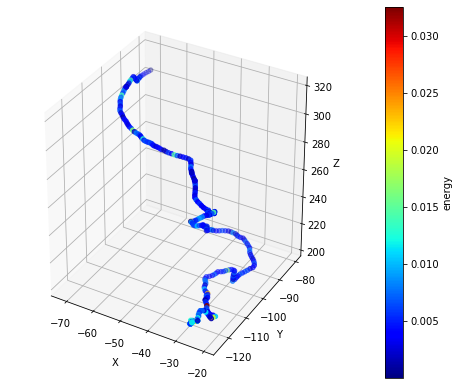

In [13]:
df_hits_MC_event = df_hits_MC.loc[nevent]
plot_3d_hits(df_hits_MC_event)

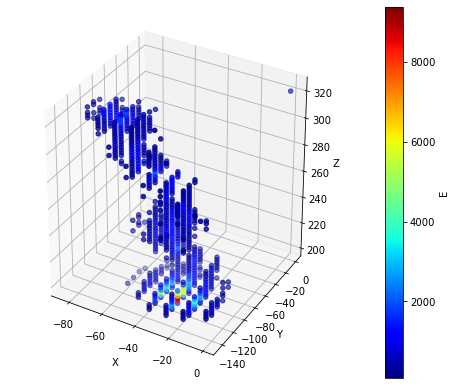

In [14]:
df_hits_penth_event = df_hits_penth.loc[df_hits_penth['event'] == nevent]

plot_3d_hits(df_hits_penth_event, value = 'E', coords = ['X', 'Y', 'Z'])

SI ESO AÑADIR FUNCIONES DE PLOTEADO NUEVAS O A SCN O A ESTE REPOSITORIO... (adaptarla a que dé opción de plotear una cosa solo ou duas!!)

In [18]:
def plot_3d_hits_double(hits, hits2, double = True, value='energy', coords = ['x', 'y', 'z'], cmap = mpl.cm.jet, value2 = 'E', coords2 = ['X', 'Y', 'Z'], opacity = 0.1, label1 = None, label2 = None):
    #Función para hacer plot de distintos hits de un mismo evento superponiéndose
    
    fig  = plt.figure(figsize=(15, 15), frameon=False)
    gs   = fig.add_gridspec(2, 40)
    ax   = fig.add_subplot(gs[0, 0:16], projection = '3d')
    axcb = fig.add_subplot(gs[0, 18])
    norm = mpl.colors.Normalize(vmin=hits.loc[:, value].min(), vmax=hits.loc[:, value].max())

    m    = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

    colors = np.asarray(np.vectorize(m.to_rgba)(hits.loc[:, value]))
    colors = np.rollaxis(colors, 0, 2)

    ax.scatter(hits[coords[0]], hits[coords[1]], hits[coords[2]], c=colors, marker='o', label = label1)
    cb = mpl.colorbar.ColorbarBase(axcb, cmap=cmap, norm=norm, orientation='vertical')

    if double == True:
        
        norm2   = mpl.colors.Normalize(vmin=hits2.loc[:, value2].min(), vmax=hits2.loc[:, value2].max())

        m2      = mpl.cm.ScalarMappable(norm=norm2, cmap=cmap)

        colors2 = np.asarray(np.vectorize(m2.to_rgba)(hits2.loc[:, value2]))
        colors2 = np.rollaxis(colors2, 0, 2)

        ax.scatter(hits2[coords2[0]], hits2[coords2[1]], hits2[coords2[2]], c=colors2, marker='o', alpha = opacity, label = label2)
    
    ax.set_xlabel('X ')
    ax.set_ylabel('Y ')
    ax.set_zlabel('Z ')
    cb.set_label (value)
    if label1 != None:
        ax.legend()

    plt.show()

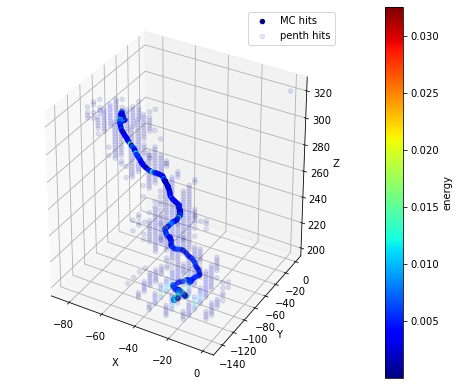

In [19]:
plot_3d_hits_double(df_hits_MC_event, df_hits_penth_event, label1 = 'MC hits', label2 = 'penth hits')

Ahora veamos el esmeralda de Marija 

In [11]:
dir_esm = '/Users/mperez/NEXT/bersh_prod/prod_example/Tl208_NEW_v1_03_01_nexus_v5_03_04_cut0.cdst_6206.root.h5'

In [12]:
with tb.open_file(dir_esm) as h5in:
    print(h5in)

/Users/mperez/NEXT/bersh_prod/prod_example/Tl208_NEW_v1_03_01_nexus_v5_03_04_cut0.cdst_6206.root.h5 (File) ''
Last modif.: 'Sat Oct  2 19:23:50 2021'
Object Tree: 
/ (RootGroup) ''
/CHITS (Group) ''
/CHITS/highTh (Table(83259,), shuffle, zlib(4)) 'Hits'
/CHITS/lowTh (Table(263600,), shuffle, zlib(4)) 'Hits'
/DST (Group) ''
/DST/Events (Table(808,), shuffle, zlib(4)) 'KDST Events'
/Filters (Group) ''
/Filters/high_th_select (Table(545,), shuffle, zlib(4)) 'Event has passed filter flag'
/Filters/low_th_select (Table(545,), shuffle, zlib(4)) 'Event has passed filter flag'
/Filters/topology_select (Table(545,), shuffle, zlib(4)) 'Event has passed filter flag'
/MC (Group) ''
/MC/extents (Table(545,), shuffle, zlib(4)) 'extents'
/MC/generators (Table(0,), shuffle, zlib(4)) 'generators'
/MC/hits (Table(136630,), shuffle, zlib(4)) 'hits'
/MC/particles (Table(16461,), shuffle, zlib(4)) 'particles'
/Run (Group) ''
/Run/events (Table(545,), shuffle, zlib(4)) 'event info table'
/Run/runInfo (Table

In [13]:
dir_esm_ex = '/Users/mperez/NEXT/bersh_prod/prod_example/esmeralda_example.h5'

In [14]:
with tb.open_file(dir_esm_ex) as h5in:
    print(h5in)

/Users/mperez/NEXT/bersh_prod/prod_example/esmeralda_example.h5 (File) ''
Last modif.: 'Fri Oct  1 13:56:11 2021'
Object Tree: 
/ (RootGroup) ''
/CHITS (Group) ''
/CHITS/highTh (Table(83259,), shuffle, zlib(4)) 'Hits'
/CHITS/lowTh (Table(263600,), shuffle, zlib(4)) 'Hits'
/DST (Group) ''
/DST/Events (Table(808,), shuffle, zlib(4)) 'KDST Events'
/Filters (Group) ''
/Filters/high_th_select (Table(545,), shuffle, zlib(4)) 'Event has passed filter flag'
/Filters/low_th_select (Table(545,), shuffle, zlib(4)) 'Event has passed filter flag'
/Filters/topology_select (Table(545,), shuffle, zlib(4)) 'Event has passed filter flag'
/MC (Group) ''
/MC/event_mapping (Table(545,), shuffle, zlib(4)) ''
/MC/generators (Table(0,), shuffle, zlib(4)) ''
/MC/hits (Table(136630,), shuffle, zlib(4)) ''
/MC/particles (Table(16461,), shuffle, zlib(4)) ''
/Run (Group) ''
/Run/events (Table(545,), shuffle, zlib(4)) 'event info table'
/Run/runInfo (Table(545,), shuffle, zlib(4)) 'run info table'
/Summary (Group) 

Parece que por número de datos etc sí coinciden yess

Hits corregidos de esmeralda

In [15]:
df_hits_esm_high = dio.load_dst(dir_esm, 'CHITS', 'highTh')
df_hits_esm_low = dio.load_dst(dir_esm, 'CHITS', 'lowTh')

Si pongo en esta casilla anterior el directorio de el esmeralda hecho por mi veo que coinciden :)

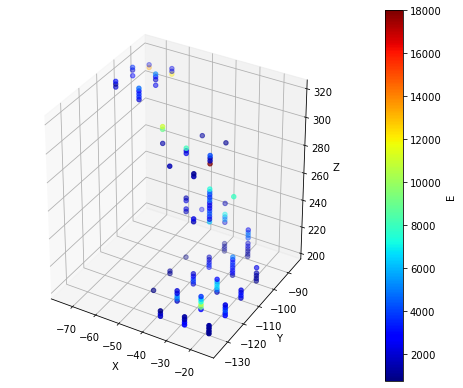

In [16]:
df_hits_esm_high_event = df_hits_esm_high.loc[df_hits_esm_high['event'] == nevent]

plot_3d_hits(df_hits_esm_high_event, value = 'E', coords = ['X', 'Y', 'Z'])

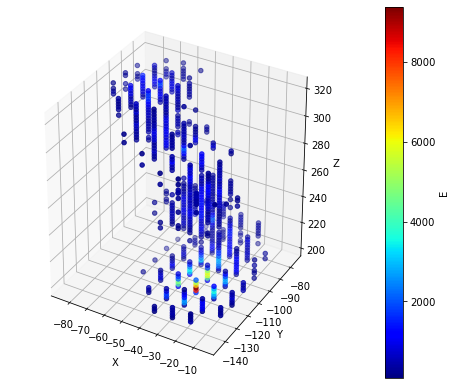

In [17]:
df_hits_esm_low_event = df_hits_esm_low.loc[df_hits_esm_low['event'] == nevent]

plot_3d_hits(df_hits_esm_low_event, value = 'E', coords = ['X', 'Y', 'Z'])

Ploteo low y high juntos...

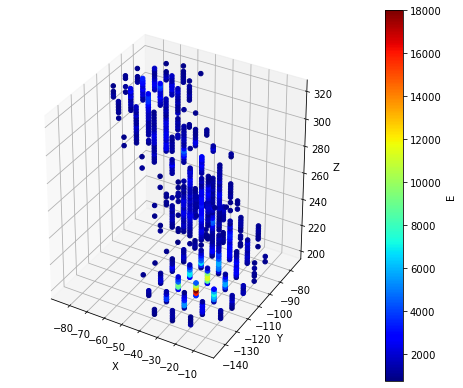

In [18]:
plot_3d_hits_double(df_hits_esm_high_event, df_hits_esm_low_event, value = 'E', coords = ['X', 'Y', 'Z'], opacity = 1)

Veamos ahora qué salió de correr beersheba...

In [19]:
dir_bersh = '/Users/mperez/NEXT/bersh_prod/prod_example/beersheba_example.h5'

In [20]:
with tb.open_file(dir_bersh) as h5in:
    print(h5in)

/Users/mperez/NEXT/bersh_prod/prod_example/beersheba_example.h5 (File) ''
Last modif.: 'Thu Oct  7 19:55:43 2021'
Object Tree: 
/ (RootGroup) ''
/DECO (Group) ''
/DECO/Events (Table(2076860,), shuffle, zlib(4)) 'Deconvolved hits'
/DST (Group) ''
/DST/Events (Table(808,), shuffle, zlib(4)) 'KDST Events'
/MC (Group) ''
/MC/event_mapping (Table(545,), shuffle, zlib(4)) ''
/MC/generators (Table(0,), shuffle, zlib(4)) ''
/MC/hits (Table(136630,), shuffle, zlib(4)) ''
/MC/particles (Table(16461,), shuffle, zlib(4)) ''
/Run (Group) ''
/Run/events (Table(545,), shuffle, zlib(4)) 'event info table'
/Run/runInfo (Table(545,), shuffle, zlib(4)) 'run info table'
/Summary (Group) ''
/Summary/Events (Table(545,), shuffle, zlib(4)) 'Event summary information'



Vale, parece q no hizo absolutamente nada!! Quizás es por el hecho de que el input de beersheba son esmeraldas, como venía sospechando

In [37]:
df_hits_bersh = dio.load_dst(dir_bersh, 'DECO', 'Events')

In [38]:
df_hits_bersh

,event,npeak,X,Y,Z,E
0,0,0,-36.5,166.5,90.484500,0.000172
1,0,0,-35.5,164.5,90.484500,0.000193
2,0,0,-35.5,165.5,90.484500,0.000467
3,0,0,-35.5,166.5,90.484500,0.000567
4,0,0,-35.5,167.5,90.484500,0.000377
...,...,...,...,...,...,...
2076855,546,0,-59.5,151.5,361.644844,0.000306
2076856,546,0,-58.5,148.5,361.644844,0.000164
2076857,546,0,-58.5,149.5,361.644844,0.000245
2076858,546,0,-58.5,150.5,361.644844,0.000239


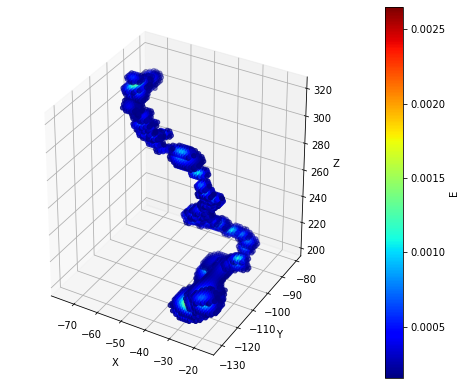

In [22]:
df_hits_bersh_event = df_hits_bersh.loc[df_hits_bersh['event'] == nevent]

plot_3d_hits(df_hits_bersh_event, value = 'E', coords = ['X', 'Y', 'Z'])

Los datos de MC con su beersheba por encima

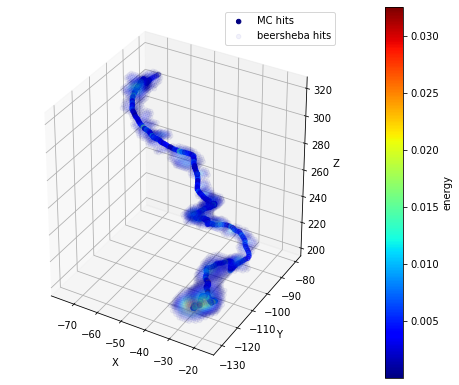

In [23]:
plot_3d_hits_double(df_hits_MC_event, df_hits_bersh_event, opacity = 0.05, label1 = 'MC hits', label2 = 'beersheba hits')

Se nota la diferencia con los penthesileas/esmeraldas la vd...

In [24]:
dir_esm2 = '/Users/mperez/NEXT/bersh_prod/prod_example/Tl208_NEW_v1_03_01_nexus_v5_03_04_cut24.esmeralda_6206.root.h5'

In [30]:
dir_bersh2 = '/Users/mperez/NEXT/bersh_prod/prod_example/Tl208_NEW_v1_03_01_nexus_v5_03_04_cut24.beersheba_6206.root.h5'

In [31]:
with tb.open_file(dir_esm2) as h5in:
    print(h5in)

/Users/mperez/NEXT/bersh_prod/prod_example/Tl208_NEW_v1_03_01_nexus_v5_03_04_cut24.esmeralda_6206.root.h5 (File) ''
Last modif.: 'Sat Oct  9 14:53:36 2021'
Object Tree: 
/ (RootGroup) ''
/CHITS (Group) ''
/CHITS/highTh (Table(86919,), shuffle, zlib(4)) 'Hits'
/CHITS/lowTh (Table(280841,), shuffle, zlib(4)) 'Hits'
/DST (Group) ''
/DST/Events (Table(808,), shuffle, zlib(4)) 'KDST Events'
/Filters (Group) ''
/Filters/high_th_select (Table(571,), shuffle, zlib(4)) 'Event has passed filter flag'
/Filters/low_th_select (Table(571,), shuffle, zlib(4)) 'Event has passed filter flag'
/Filters/topology_select (Table(571,), shuffle, zlib(4)) 'Event has passed filter flag'
/MC (Group) ''
/MC/extents (Table(571,), shuffle, zlib(4)) 'extents'
/MC/generators (Table(0,), shuffle, zlib(4)) 'generators'
/MC/hits (Table(143816,), shuffle, zlib(4)) 'hits'
/MC/particles (Table(17519,), shuffle, zlib(4)) 'particles'
/Run (Group) ''
/Run/events (Table(571,), shuffle, zlib(4)) 'event info table'
/Run/runInfo 

In [32]:
with tb.open_file(dir_bersh2) as h5in:
    print(h5in)

/Users/mperez/NEXT/bersh_prod/prod_example/Tl208_NEW_v1_03_01_nexus_v5_03_04_cut24.beersheba_6206.root.h5 (File) ''
Last modif.: 'Sat Oct  9 12:33:38 2021'
Object Tree: 
/ (RootGroup) ''
/DECO (Group) ''
/DECO/Events (Table(2153387,), shuffle, zlib(4)) 'Deconvolved hits'
/DST (Group) ''
/DST/Events (Table(808,), shuffle, zlib(4)) 'KDST Events'
/MC (Group) ''
/MC/event_mapping (Table(571,), shuffle, zlib(4)) ''
/MC/generators (Table(0,), shuffle, zlib(4)) ''
/MC/hits (Table(143816,), shuffle, zlib(4)) ''
/MC/particles (Table(17519,), shuffle, zlib(4)) ''
/Run (Group) ''
/Run/events (Table(571,), shuffle, zlib(4)) 'event info table'
/Run/runInfo (Table(571,), shuffle, zlib(4)) 'run info table'
/Summary (Group) ''
/Summary/Events (Table(571,), shuffle, zlib(4)) 'Event summary information'



In [33]:
df_hits_esm2 = dio.load_dst(dir_esm2, 'CHITS', 'lowTh')

In [34]:
df_hits_esm2

,event,time,npeak,Xpeak,Ypeak,nsipm,X,Y,Xrms,Yrms,Z,Q,E,Qc,Ec,track_id,Ep
0,48000024,0.0,0,26.445711,154.489252,1,25.0,155.0,0.0,0.0,277.415844,6.604475,485.389854,-1.0,0.002063,-1,-1.0
1,48000024,0.0,0,26.445711,154.489252,1,25.0,155.0,0.0,0.0,279.156281,73.584854,1224.749665,-1.0,0.005211,-1,-1.0
2,48000024,0.0,0,26.445711,154.489252,1,25.0,165.0,0.0,0.0,279.156281,39.650131,659.938591,-1.0,0.002988,-1,-1.0
3,48000024,0.0,0,26.445711,154.489252,1,25.0,145.0,0.0,0.0,279.156281,39.080902,650.464315,-1.0,0.002690,-1,-1.0
4,48000024,0.0,0,26.445711,154.489252,1,15.0,155.0,0.0,0.0,279.156281,34.102646,567.605992,-1.0,0.002413,-1,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280836,48000597,0.0,0,27.202864,-60.771941,1,25.0,-95.0,0.0,0.0,359.590563,12.404322,900.494242,-1.0,0.003462,-1,-1.0
280837,48000597,0.0,0,27.202864,-60.771941,1,5.0,-85.0,0.0,0.0,359.590563,12.220825,887.173278,-1.0,0.003377,-1,-1.0
280838,48000597,0.0,0,27.202864,-60.771941,1,15.0,-95.0,0.0,0.0,359.590563,11.637392,844.818831,-1.0,0.003244,-1,-1.0
280839,48000597,0.0,0,27.202864,-60.771941,1,15.0,-75.0,0.0,0.0,359.590563,7.293830,529.497059,-1.0,0.001990,-1,-1.0


In [35]:
df_hits_bersh2 = dio.load_dst(dir_bersh2, 'DECO', 'Events')

In [36]:
df_hits_bersh2

,event,npeak,X,Y,Z,E
0,48000024,0,20.5,150.5,279.156281,0.000148
1,48000024,0,20.5,151.5,279.156281,0.000160
2,48000024,0,20.5,152.5,279.156281,0.000170
3,48000024,0,20.5,153.5,279.156281,0.000173
4,48000024,0,20.5,154.5,279.156281,0.000167
...,...,...,...,...,...,...
2153382,48000597,0,20.5,-85.5,359.590563,0.000263
2153383,48000597,0,21.5,-87.5,359.590563,0.000223
2153384,48000597,0,21.5,-86.5,359.590563,0.000256
2153385,48000597,0,21.5,-85.5,359.590563,0.000219


La columna event no estaba reseteada, simplemente yo había hecho pruebas con el fichero del primer archivo pienso, y por eso estaba de 0 a 500 y pico... Aun así, mirar bien otros, lo q pasa es que ahora sin poder copiar bien del cesga me da tol sobo pero esta semana podría

Si lo necesitara, esta es una forma sencilla de resetear la numeración, pero no sé si me convendrá hacerlo

In [39]:
for i, num in enumerate(df_hits_bersh2['event'].unique()):
    df_hits_bersh2.loc[df_hits_bersh2['event'] == num, 'event'] = i

In [40]:
df_hits_bersh2

,event,npeak,X,Y,Z,E
0,0,0,20.5,150.5,279.156281,0.000148
1,0,0,20.5,151.5,279.156281,0.000160
2,0,0,20.5,152.5,279.156281,0.000170
3,0,0,20.5,153.5,279.156281,0.000173
4,0,0,20.5,154.5,279.156281,0.000167
...,...,...,...,...,...,...
2153382,570,0,20.5,-85.5,359.590563,0.000263
2153383,570,0,21.5,-87.5,359.590563,0.000223
2153384,570,0,21.5,-86.5,359.590563,0.000256
2153385,570,0,21.5,-85.5,359.590563,0.000219


ValueError: cannot call `vectorize` on size 0 inputs unless `otypes` is set

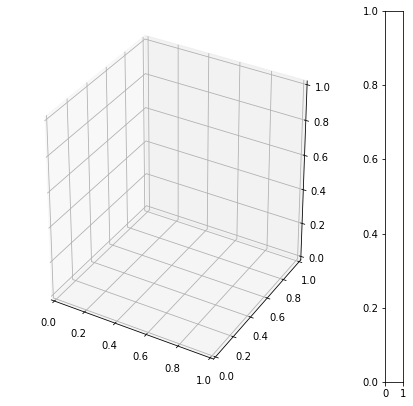

In [52]:
df_hits_esm_event2 = df_hits_esm2.loc[df_hits_esm2['event'] == nevent]

plot_3d_hits(df_hits_esm_event2, value = 'E', coords = ['X', 'Y', 'Z'])

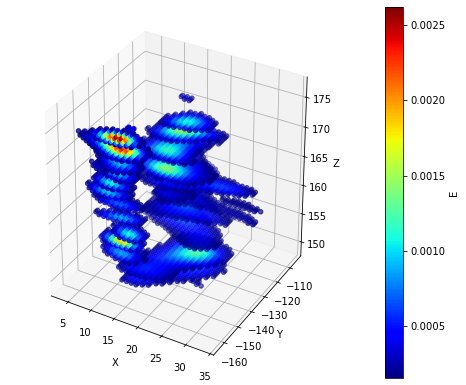

In [47]:
df_hits_bersh_event2 = df_hits_bersh2.loc[df_hits_bersh2['event'] == 48000325]

plot_3d_hits(df_hits_bersh_event2, value = 'E', coords = ['X', 'Y', 'Z'])